# Data Analysis with Sklearn

## Most commonly, the steps in using the Scikit-Learn are as follows.

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
a. For supervised learning, often we predict labels for unknown data using the predict() method.
<b. For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [171]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

European Soccer Database has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

# import libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os

os.chdir('C:\\Users\\18174')

# import data

In [173]:
player = pd.read_csv("Player_Attributes (1).csv")
player

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [174]:
player.groupby(['player_api_id', 'player_fifa_api_id'])['id'].count()

player_api_id  player_fifa_api_id
2625           148544                14
2752           135819                21
2768           110019                21
2770           182861                15
2790           110809                 5
                                     ..
744907         226508                11
746419         233930                 2
748432         233969                 2
750435         225462                 9
750584         234141                 2
Name: id, Length: 11069, dtype: int64

In [175]:
playerAtt=pd.read_csv('Player_Attributes (1).csv')
playerAtt.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [176]:
playerAtt.groupby(['player_api_id', 'player_fifa_api_id'])['id'].count()

player_api_id  player_fifa_api_id
2625           148544                14
2752           135819                21
2768           110019                21
2770           182861                15
2790           110809                 5
                                     ..
744907         226508                11
746419         233930                 2
748432         233969                 2
750435         225462                 9
750584         234141                 2
Name: id, Length: 11069, dtype: int64

In [177]:
playerAtt[['player_api_id', 'player_fifa_api_id']].groupby(['player_api_id', 'player_fifa_api_id']).count()


,
player_api_id,player_fifa_api_id
2625,148544
2752,135819
2768,110019
2770,182861
2790,110809
...,...
744907,226508
746419,233930
748432,233969


In [178]:
player = pd.read_csv('Player_Attributes (1).csv')
playerAtt = pd.read_csv('Player_Attributes (1).csv')
player.head()
playerAtt.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [179]:
playerAtt[['id', 'player_api_id', 'player_fifa_api_id']].groupby(['player_api_id', 'player_fifa_api_id']).count()
playerAtt[['id', 'player_api_id', 'player_fifa_api_id']].groupby(['player_api_id', 'player_fifa_api_id']).count()


,,id
player_api_id,player_fifa_api_id,
2625,148544,14
2752,135819,21
2768,110019,21
2770,182861,15
2790,110809,5
...,...,...
744907,226508,11
746419,233930,2
748432,233969,2


,,id
player_api_id,player_fifa_api_id,
2625,148544,14
2752,135819,21
2768,110019,21
2770,182861,15
2790,110809,5
...,...,...
744907,226508,11
746419,233930,2
748432,233969,2


In [180]:
playerAtt.groupby(['player_api_id', 'player_fifa_api_id'])['id'].count()

player_api_id  player_fifa_api_id
2625           148544                14
2752           135819                21
2768           110019                21
2770           182861                15
2790           110809                 5
                                     ..
744907         226508                11
746419         233930                 2
748432         233969                 2
750435         225462                 9
750584         234141                 2
Name: id, Length: 11069, dtype: int64

In [181]:
# check columns
# player.columns
# playerAtt.columns
list(player)
list(playerAtt)
playerAtt.dtypes

['Unnamed: 0',
 'id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

['Unnamed: 0',
 'id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

Unnamed: 0               int64
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
position

In [182]:
del player['Unnamed: 0']

In [183]:
del playerAtt['Unnamed: 0']

In [184]:
# Get a general idea of the data
player.head()
player.shape
playerAtt.head()
playerAtt.shape

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


(183978, 42)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


(183978, 42)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Analytics of the Data</p>
<br>
'player' table describes player demographic features.<br>
'player_attributes'table describes players' various performance metrics.<br>
What questions can we ask? The most obvious prediction question is: predict a player's over_all rating using his performance metrics.

### 1. Data Cleaning

Check for missing values

In [185]:
# Checking which columns have missing values
playerAtt.isnull().any()
playerAtt.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [186]:
# Check how many records have missing values and decide what to do
# We can extract the records with missing values
playernull = player[player.isnull().any(axis=1)]
playernull.head()
playerAttnull = playerAtt[playerAtt.isnull().any(axis=1)]
playerAttnull.head()
playerAttnull.shape

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,NaN,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,NaN,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,NaN,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,NaN,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,NaN,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30 00:00:00,64.0,71.0,right,NaN,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22 00:00:00,64.0,71.0,right,NaN,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30 00:00:00,66.0,71.0,right,NaN,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30 00:00:00,68.0,75.0,right,NaN,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22 00:00:00,66.0,65.0,right,NaN,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


(3624, 42)

In [187]:
# By default, any() checks each row and reports whether a column has missing values (True - yes)
# With axis = 1, any() checks each column and reports whether a row has missing values (True - yes)
player.isnull().any(axis = 1)
playerAtt.isnull().any(axis = 1)

0         False
1         False
2         False
3         False
4         False
          ...  
183973    False
183974    False
183975    False
183976    False
183977    False
Length: 183978, dtype: bool

0         False
1         False
2         False
3         False
4         False
          ...  
183973    False
183974    False
183975    False
183976    False
183977    False
Length: 183978, dtype: bool

Comparing to a total of 183978 records in playerAtt, there are 3624 records with missing values. That is about 2%. For simplicity, we drop them.

In [188]:
# Delete records with missing values
playerAtt.shape
playerAtt = playerAtt.dropna()
playerAtt.shape

(183978, 42)

(180354, 42)

### 2. Prepare the data for analysis
    Generate target and features

In [189]:
# Target is the dependent variable - overall_rating
target=['overall_rating']
y = playerAtt[target]

In [190]:
# Features are the independent variables
features = [
       'potential', 'preferred_foot','crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
X = playerAtt[features]

In [191]:
# Take a look at a record in X
X.iloc[2]

potential              66.0
preferred_foot        right
crossing               49.0
finishing              44.0
heading_accuracy       71.0
short_passing          61.0
volleys                44.0
dribbling              51.0
curve                  45.0
free_kick_accuracy     39.0
long_passing           64.0
ball_control           49.0
acceleration           60.0
sprint_speed           64.0
agility                59.0
reactions              47.0
balance                65.0
shot_power             55.0
jumping                58.0
stamina                54.0
strength               76.0
long_shots             35.0
aggression             63.0
interceptions          41.0
positioning            45.0
vision                 54.0
penalties              48.0
marking                65.0
standing_tackle        66.0
sliding_tackle         69.0
gk_diving               6.0
gk_handling            11.0
gk_kicking             10.0
gk_positioning          8.0
gk_reflexes             8.0
Name: 2, dtype: obje

In [192]:
# preferred_foot is not numerical; we need to transform it to dummy variables
footdummy = playerAtt['preferred_foot'].str.get_dummies()
footdummy.head()

,left,right
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [193]:
# Merge the dummies back to the data
playerAtt = pd.merge(playerAtt, footdummy, left_index = True, right_index = True)

In [194]:
playerAtt.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,left,right
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,1
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,1


In [195]:
# when select features, only select one dummy- 'right' or 'left', not both
# for n dummies, select n-1
features = [
       'potential', 'right','crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
X = playerAtt[features]

### 2. Split the Dataset into Training and Test Datasets

In [196]:
# test_size sets the size of test dataset; random_state is to make the random selection of records
# repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [197]:
X_train.shape
X_test.shape

(120837, 35)

(59517, 35)

### 3. Fit the model

In [198]:
# Instantiating the model class
regressor=LinearRegression()
# Fit the training dataset
regressor.fit(X_train, y_train)

LinearRegression()

In [199]:
# Check the output
regressor.coef_
regressor.coef_.shape
regressor.intercept_

array([[ 0.37835564,  0.02056774,  0.02269427,  0.01229871,  0.06948158,
         0.05065139,  0.003643  , -0.01285582,  0.01165699,  0.01132588,
         0.00745847,  0.13424647,  0.00594105,  0.0089139 , -0.00776197,
         0.21046757,  0.00769604,  0.01663291,  0.01583667, -0.00619775,
         0.06157667, -0.01326524,  0.02118608,  0.01271542, -0.01063276,
        -0.00159254,  0.01491982,  0.03190639,  0.00298646, -0.02794178,
         0.16380327,  0.0325645 , -0.0343739 ,  0.05571943,  0.0250379 ]])

(1, 35)

array([-3.6798711])

In [200]:
# print out the coefficients; regressor.coef_ is a 1Xn array
for i in range(len(features)):
    print(features[i], regressor.coef_[0,i])

potential 0.37835564062475263
right 0.020567737617405518
crossing 0.022694269657818837
finishing 0.01229871438425533
heading_accuracy 0.06948158107239719
short_passing 0.05065138597920158
volleys 0.003642995513581096
dribbling -0.012855822256194242
curve 0.011656986599233865
free_kick_accuracy 0.011325884398550552
long_passing 0.007458469153437007
ball_control 0.13424646812007915
acceleration 0.00594105187701857
sprint_speed 0.008913897019697801
agility -0.007761968804389868
reactions 0.2104675652071902
balance 0.007696040008034988
shot_power 0.016632913631520634
jumping 0.015836673790199818
stamina -0.006197751071172261
strength 0.0615766698732405
long_shots -0.013265237166952257
aggression 0.021186079666237954
interceptions 0.012715420737219494
positioning -0.010632762216476594
vision -0.0015925383556425906
penalties 0.01491981936862892
marking 0.03190638943018007
standing_tackle 0.002986463841133478
sliding_tackle -0.02794178188681504
gk_diving 0.16380327160001834
gk_handling 0.0325

In [201]:
# Optional
# For better interpretation of linear regression model, you may consider statsmodels package
import statsmodels.api as sm

# Add a constant
X_train = sm.add_constant(X_train)

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.836e+04
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:07:34   Log-Likelihood:            -2.9596e+05
No. Observations:              120837   AIC:                         5.920e+05
Df Residuals:                  120801   BIC:                         5.923e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6799      0

### 4. Making predictions with the model

In [202]:
# prediction is made on test dataset
y_prediction=regressor.predict(X_test)
y_prediction
y_prediction.shape

array([[73.0662401 ],
       [68.91724453],
       [66.99267146],
       ...,
       [71.97686678],
       [64.8999528 ],
       [62.44104399]])

(59517, 1)

In [203]:
# show the prediction; use np concatenate to join the array and X_test
predictedy=np.concatenate([y_prediction,X_test],axis=1)
predictedy=pd.DataFrame(predictedy)

In [204]:
predictedy.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,73.066240,76.0,0.0,65.0,59.0,67.0,79.0,77.0,73.0,67.0,...,69.0,71.0,68.0,78.0,80.0,2.0,4.0,4.0,2.0,4.0
1,68.917245,76.0,1.0,47.0,61.0,58.0,80.0,62.0,77.0,75.0,...,72.0,68.0,37.0,29.0,29.0,7.0,8.0,10.0,8.0,11.0
2,66.992671,72.0,1.0,66.0,59.0,55.0,72.0,59.0,67.0,68.0,...,68.0,68.0,47.0,54.0,49.0,6.0,15.0,13.0,6.0,6.0
3,69.980247,72.0,1.0,46.0,33.0,76.0,64.0,33.0,38.0,39.0,...,63.0,47.0,72.0,74.0,70.0,7.0,6.0,9.0,13.0,10.0
4,73.465742,79.0,1.0,77.0,66.0,53.0,79.0,70.0,78.0,76.0,...,79.0,74.0,42.0,60.0,47.0,9.0,9.0,11.0,11.0,10.0


### 5. Evaluate the model

In [205]:
# Calculate Root Mean Square Error (RMSE); Can be used to compare model performance
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSElinear=sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))
print(RMSElinear)

2.7846222530481004


In [206]:
# Optional: K-fold cross-validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores=cross_val_score(regressor, X, y, cv=5)
scores

array([0.84387387, 0.83703772, 0.84049431, 0.84018984, 0.84257815])

# We repeat 3, 4, 5 with Decision Tree Regressor

In [207]:
# 3. Fit the model
regressorT = DecisionTreeRegressor(max_depth=20)
regressorT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [208]:
# 4. make prediction
y_predT=regressor.predict(X_test)

In [209]:
# 5. Evaluate the model
RMSEtree=sqrt(mean_squared_error(y_true=y_test,y_pred=y_predT))
print(RMSEtree)

2.7846222530481004


In [210]:
# cross-validation - r-square
scoresT=cross_val_score(regressorT, X, y, cv=5)
scoresT

array([0.88696718, 0.87980632, 0.88485229, 0.88293512, 0.89032975])

# feature engineering using PCA

In [211]:
# Import the package; fit the original feature matrix
from sklearn.decomposition import PCA
# instantiating the PCA class; 
pca = PCA(n_components=5)
# fit the original feature matrix X
pca.fit(X)

PCA(n_components=5)

In [212]:
# Get the components
principalComponents = pca.fit_transform(X)
# Create a dataframe as the new feature matrix
pcadf = pd.DataFrame(principalComponents, columns = ['p1','p2','p3','p4','p5'])
pcadf.head()

,p1,p2,p3,p4,p5
0,7.370038,51.091336,-18.195277,4.292106,6.835704
1,7.370038,51.091336,-18.195277,4.292106,6.835704
2,12.206358,38.233251,-26.126437,2.939075,8.520540
3,15.635234,35.287630,-30.524251,2.365323,7.942028
4,15.635234,35.287630,-30.524251,2.365323,7.942028


In [213]:
# Use the component matrix for model fitting and prediction
Xp_train, Xp_test, yp_train, yp_test = train_test_split(pcadf, y, test_size = 0.33, random_state = 0)
# linear regression
regressorP = LinearRegression()
regressorP.fit(Xp_train, yp_train)
regressorP.coef_
regressorP.coef_.shape
regressorP.intercept_

LinearRegression()

array([[-0.04102108, -0.00381724,  0.14388057,  0.07920819, -0.07166843]])

(1, 5)

array([68.62838305])

In [214]:
# Prediction and RMSE
y_predP=regressorP.predict(Xp_test)
RMSEPCA=sqrt(mean_squared_error(y_true=yp_test,y_pred=y_predP))
print(RMSEPCA)

4.976922980550787


The RMSE is larger than using all independent variables. We can adjust the number of components to get better results.

# Example of classification

In [215]:
# Check overall_rating statistics
playerAtt['overall_rating'].describe()
# Code a new variable
yCat = playerAtt['overall_rating'].apply(lambda x: 'High' if x>=70 else 'Low')

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [216]:
X
yCat
type(yCat)

,potential,right,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,1,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,1,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,85.0,1,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,80.0,1,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,80.0,1,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,81.0,1,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


0          Low
1          Low
2          Low
3          Low
4          Low
          ... 
183973    High
183974    High
183975    High
183976    High
183977    High
Name: overall_rating, Length: 180354, dtype: object

pandas.core.series.Series

In [217]:
# Use the principal components and categorical y
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pcadf, yCat, test_size = 0.33, random_state = 0)

In [218]:
# Fit the model using logistic regression
from sklearn.linear_model import LogisticRegression
logRegressor = LogisticRegression()
logRegressor.fit(Xc_train, yc_train)

LogisticRegression()

In [219]:
# Get the prediction
yCat_pred = logRegressor.predict(Xc_test)
yCat_pred[:10]

array(['High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'Low'], dtype=object)

In [220]:
# Calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_true = yc_test, y_pred = yCat_pred)

0.765529176537796

In [221]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = yc_test, y_pred = yCat_pred)

array([[19425,  7750],
       [ 6205, 26137]], dtype=int64)

In [222]:
# label the confusion matrix
labels = ['High', 'Low']
cm = confusion_matrix(y_true = yc_test, y_pred = yCat_pred, labels = labels)

Text(0.5, 1.0, 'Confusion matrix of the classifier')

[Text(-1.0, 1, ''),
 Text(0.0, 1, 'High'),
 Text(1.0, 1, 'Low'),
 Text(2.0, 1, '')]

[Text(0, -1.0, ''),
 Text(0, 0.0, 'High'),
 Text(0, 1.0, 'Low'),
 Text(0, 2.0, '')]

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actual')

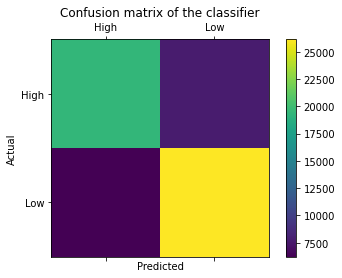

In [223]:
# To plot it using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

<AxesSubplot:>

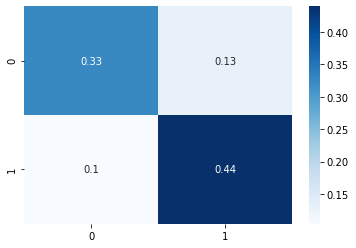

In [224]:
# To plot it using seaborn package
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues')